# **Project Name**    - Ford Bike Sharing Project



##### **Project Type**    - EDA/Regression
##### **Contribution**    - Individual
##### **Team Member 1 -** Omkar Kummarikuntla

# **Project Summary -**

The **Ford GoBike system** serves as a critical transportation alternative in the San Francisco Bay Area, offering a convenient and eco-friendly way to travel. This project dives deep into the trip data to **uncover patterns in user behavior and trip characteristics,** with a focus on how long trips typically last, and whether trip duration is influenced by time of year or user type.

To guide the analysis, we explore the following key questions:

- **How long does the average trip take?**

- **Is the trip duration affected by weather or seasons (inferred through months)?**

- **Does trip duration vary significantly between subscribers and customers?**

The analysis journey follows a structured path:

- **Introduction of the topic and dataset** to set the stage.
- **Preliminary data investigation and wrangling** to clean and understand the dataset.

- Further **data wrangling** to shape the data for analysis.

- **Univariate analysis** to summarize key features like trip duration and user demographics.

- **Bivariate and multivariate exploration** to examine how trip duration relates to months and user types.

- **Conclusions and answers** to provide actionable insights and summarize key findings.

Through this exploration, we aim to provide data-backed recommendations that could enhance service delivery, improve customer satisfaction, and support future infrastructure planning for the GoBike system.

# **GitHub Link -**

https://github.com/Shivi2599/Labmentix-Internship-Projects/tree/main/Ford%20GoBike%20Sharing%20project


# **Problem Statement**


#### **Define Your Business Objective?**

**Question 1:** How long does the average trip take?

**Question 2:** Is the trip duration affected by weather(months/seasons)?

**Question 3:** Does the above depend on if a user is a subscriber or customer?

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [186]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [187]:
# Load Dataset

data = pd.read_csv("/content/Dataset Ford go Bike.csv")

### Dataset First View

In [188]:
# Dataset First Look
data.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,75284,2018-01-31 22:52:35.2390,2018-02-01 19:47:19.8240,120,Mission Dolores Park,37.761420,-122.426435,285,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,1986.0,Male,No
1,85422,2018-01-31 16:13:34.3510,2018-02-01 15:57:17.3100,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,NaN,NaN,No
2,71576,2018-01-31 14:23:55.8890,2018-02-01 10:16:52.1160,304,Jackson St at 5th St,37.348759,-121.894798,296,5th St at Virginia St,37.325998,-121.877120,3039,Customer,1996.0,Male,No
3,61076,2018-01-31 14:53:23.5620,2018-02-01 07:51:20.5000,75,Market St at Franklin St,37.773793,-122.421239,47,4th St at Harrison St,37.780955,-122.399749,321,Customer,NaN,NaN,No
4,39966,2018-01-31 19:52:24.6670,2018-02-01 06:58:31.0530,74,Laguna St at Hayes St,37.776435,-122.426244,19,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,1991.0,Male,No


### Dataset Rows & Columns count

In [189]:
# Dataset Rows & Columns count
data.shape

(94802, 16)

### Dataset Information

In [190]:
# Dataset Info

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94802 entries, 0 to 94801
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   duration_sec             94802 non-null  int64  
 1   start_time               94802 non-null  object 
 2   end_time                 94802 non-null  object 
 3   start_station_id         94802 non-null  int64  
 4   start_station_name       94802 non-null  object 
 5   start_station_latitude   94802 non-null  float64
 6   start_station_longitude  94802 non-null  float64
 7   end_station_id           94802 non-null  int64  
 8   end_station_name         94802 non-null  object 
 9   end_station_latitude     94802 non-null  float64
 10  end_station_longitude    94802 non-null  float64
 11  bike_id                  94802 non-null  int64  
 12  user_type                94802 non-null  object 
 13  member_birth_year        86963 non-null  float64
 14  member_gender         

#### Duplicate Values

In [191]:
# Dataset Duplicate Value Count

data.duplicated().sum()

np.int64(0)

#### Missing Values/Null Values

In [192]:
# Missing Values/Null Values Count

data.isnull().sum()

,0
duration_sec,0
start_time,0
end_time,0
start_station_id,0
start_station_name,0
start_station_latitude,0
start_station_longitude,0
end_station_id,0
end_station_name,0
end_station_latitude,0


<Axes: >

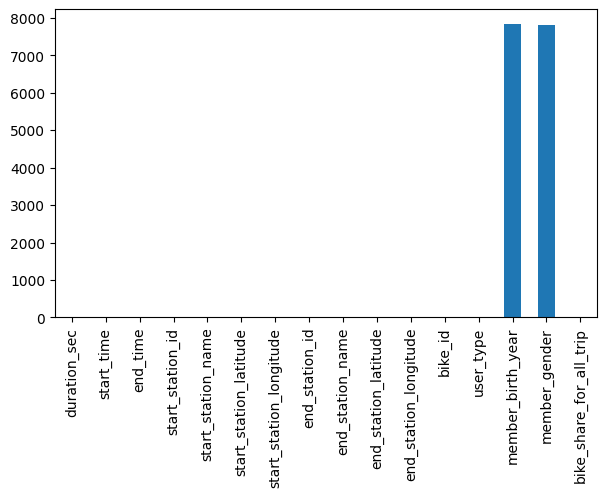

In [193]:
# Visualizing the missing values

plt.figure(figsize = (7,4))
data.isnull().sum().plot(kind = 'bar')

In [194]:
m = data['start_time'].min()
n = data['start_time'].max()

print('Start date',{m})
print('End Date and Time',{n})

Start date {'2018-01-01 00:01:53.8470'}
End Date and Time {'2018-01-31 23:53:53.6320'}


### What did you know about your dataset?

**The dataset contains trip data for a continuous period of 31 days, spanning the entire month of January 2018.**

The columns are:
- trip duration in seconds
- start time and date
- end time and date
- start station ID
- start station name
- start station latitude
- start station longitude
- end station ID
- end station name
- end station latitude
- end station longitude
- bike ID
- user type(Subscriber or Customer)
- member Year of Birth
- member gender
- bike_share_for_all_trip

**Subscriber** - member

**Customer** - casual

There are **94802** records and **16** columns in the dataset.

The columns may need some cleaning as evidenced by
- missing values in columns such as **member_birth_year, member_gender**.
- `start_time` and `end_time` datatypes.





## ***2. Understanding Your Variables***

In [195]:
# Dataset Columns

data.columns.str.strip()

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip'],
      dtype='object')

In [196]:
# Dataset Describe

data.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,94802.000000,94802.000000,94802.000000,94802.000000,94802.00000,94802.000000,94802.000000,94802.000000,86963.000000
mean,870.935930,103.766302,37.773321,-122.361677,101.00982,37.773536,-122.360776,2048.751609,1980.932420
std,2550.596891,87.730464,0.085744,0.105253,86.77949,0.085552,0.104580,1091.507513,10.803017
min,61.000000,3.000000,37.317298,-122.444293,3.00000,37.317298,-122.444293,11.000000,1900.000000
25%,359.000000,30.000000,37.771662,-122.412408,27.00000,37.773063,-122.411306,1133.000000,1975.000000
50%,555.000000,79.000000,37.781270,-122.398773,76.00000,37.781752,-122.398436,2151.500000,1983.000000
75%,854.000000,160.000000,37.795392,-122.390428,157.00000,37.795392,-122.390428,3015.000000,1989.000000
max,85546.000000,342.000000,37.880222,-121.874119,342.00000,37.880222,-121.874119,3744.000000,2000.000000


### Variables Description

| Column Name               | Description                                                                 |
|---------------------------|-----------------------------------------------------------------------------|
| `duration_sec`            | Trip duration in seconds (key for identifying short vs long trips).         |
| `start_time`, `end_time`  | Timestamp of trip start and end (used for seasonal, hourly, and weekday trends). |
| `start_station_id`, `end_station_id` | Unique identifiers of start and end stations.                |
| `start_station_name`, `end_station_name` | Names of start and end stations (great for mapping popular routes). |
| `start_station_latitude`, `start_station_longitude` | GPS coordinates for start locations.       |
| `end_station_latitude`, `end_station_longitude`     | GPS coordinates for end locations.         |
| `bike_id`                 | Unique identifier for each bike (can be used to analyze bike usage frequency). |
| `user_type`               | Either **Subscriber** or **Customer**. Subscribers are regular users.       |
| `member_birth_year`       | Birth year of the user (used to calculate age and understand demographics). |
| `member_gender`           | Gender of the user (can be used to study usage trends across genders).     |
| `bike_share_for_all_trip` | Indicates whether the user opted for bike sharing for all trips (Yes/No).  |

In [197]:
data.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip'],
      dtype='object')

### Check Unique Values for each variable.

In [198]:
# Check Unique Values for each variable.

data.nunique()

,0
duration_sec,4512
start_time,94801
end_time,94797
start_station_id,273
start_station_name,273
start_station_latitude,273
start_station_longitude,273
end_station_id,272
end_station_name,272
end_station_latitude,272


## 3. ***Data Wrangling***

### Data Wrangling Code

In [199]:
# Write your code to make your dataset analysis ready.

## Convert start_time and end_time to datetime.
data['start_time'] = pd.to_datetime(data['start_time'])
data['end_time'] = pd.to_datetime(data['end_time'])

## Convert member_birth_year to integer
data['member_birth_year'] = data['member_birth_year'].astype('Int64')

## Investigate and handle member_birth_year and member_gender where necessary.

## fill the missing values in 'member_gender'and 'member_birth_year' with 'unknown'
## only for the rows where 'user_type' is 'customer'.
data.loc[data['user_type'] == 'customer', 'member_gender'] = data.loc[data['user_type'] == 'customer', 'member_gender'].fillna('unknown')
data.loc[data['user_type'] == 'customer', 'member_birth_year'] = data.loc[data['user_type'] == 'customer', 'member_birth_year'].fillna('np.nan')


## Create derived columns (month, day, hour) from start_time for seasonality/weather analysis
data['month'] = data['start_time'].dt.month_name()
data['day'] = data['start_time'].dt.day_name()
data['hour'] = data['start_time'].dt.hour

## Create derived column (duration_mins) from duration_sec
data['duration_mins'] = round(data['duration_sec']/60,2)


In [200]:
data.head(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,month,day,hour,duration_mins
0,75284,2018-01-31 22:52:35.239,2018-02-01 19:47:19.824,120,Mission Dolores Park,37.761420,-122.426435,285,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,1986,Male,No,January,Wednesday,22,1254.73
1,85422,2018-01-31 16:13:34.351,2018-02-01 15:57:17.310,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,<NA>,NaN,No,January,Wednesday,16,1423.70
2,71576,2018-01-31 14:23:55.889,2018-02-01 10:16:52.116,304,Jackson St at 5th St,37.348759,-121.894798,296,5th St at Virginia St,37.325998,-121.877120,3039,Customer,1996,Male,No,January,Wednesday,14,1192.93


### What all manipulations have you done and insights you found?


- Convert `start_time` and `end_time` to datetime.

- Investigate and handle **member_birth_year** and **member_gender** where necessary.

- Fill the missing values in '**member_gender**'and '**member_birth_year**' with '**unknown**' only for the rows where '**user_type**' is '**customer**'.

- Create derived columns (**month, day, hour**) from **start_time** for **seasonality/weather** analysis.

- Create derived column (**duration_mins**) from duration_sec.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

In [201]:
## How long does the average trip take?

avg = round(data['duration_mins'].mean(),2)

print(f'Average Trip Duration: {avg} minutes')

Average Trip Duration: 14.52 minutes


### **Univariate Analysis**

In [202]:
# Histogram for trip duration in minutes

fig = px.histogram(data, x = 'duration_mins',
                   nbins = 100,
                   title='Trip Duration Distribution',
                   height = 500, width = 600 )

fig.show()


##### **1. Why did you pick the specific chart?**

Show the distribution of a single variable trip durations, helping you identify common values, outliers, and the overall shape of the data.



##### **2. What is/are the insight(s) found from the chart?**

- Most trips are relatively short (under 20 minutes).

- There is a long tail, indicating some very long trips, which could be outliers.

##### **3. Will the gained insights help creating a positive business impact?**


- Understanding the typical trip duration can help with bike deployment and pricing strategies.

In [203]:
# User Type Distribution

# Calculate the value counts for user type distribution
user_type_distribution = data['user_type'].value_counts()

fig = px.pie(user_type_distribution, names=user_type_distribution.index,
             values=user_type_distribution.values,
             title = 'User Type Distribution',
             height =400, width = 500,
             hole = 0.3  )

fig.show()

##### **1. Why did you pick the specific chart?**




 To show the distribution of different user types within the Ford GoBike dataset.

##### **2. What is/are the insight(s) found from the chart?**

- **Subscribers** make up a significantly **larger proportion of users** compared to **customers**.

##### **3. Will the gained insights help creating a positive business impact?**


- Focus marketing efforts on attracting more customers or increasing subscriber retention.

- Tailor services to meet the specific needs of each user type.

In [204]:
# Member Gender Distribution

# Calculate the value counts for Menber Gender Distribution
member_gender_distribution = data['member_gender'].value_counts()

fig = px.pie(member_gender_distribution, names=member_gender_distribution.index,
             values=member_gender_distribution.values,
             title = 'Member Gender Distribution',
             height =400, width = 500,
             hole = 0.3  )

fig.show()

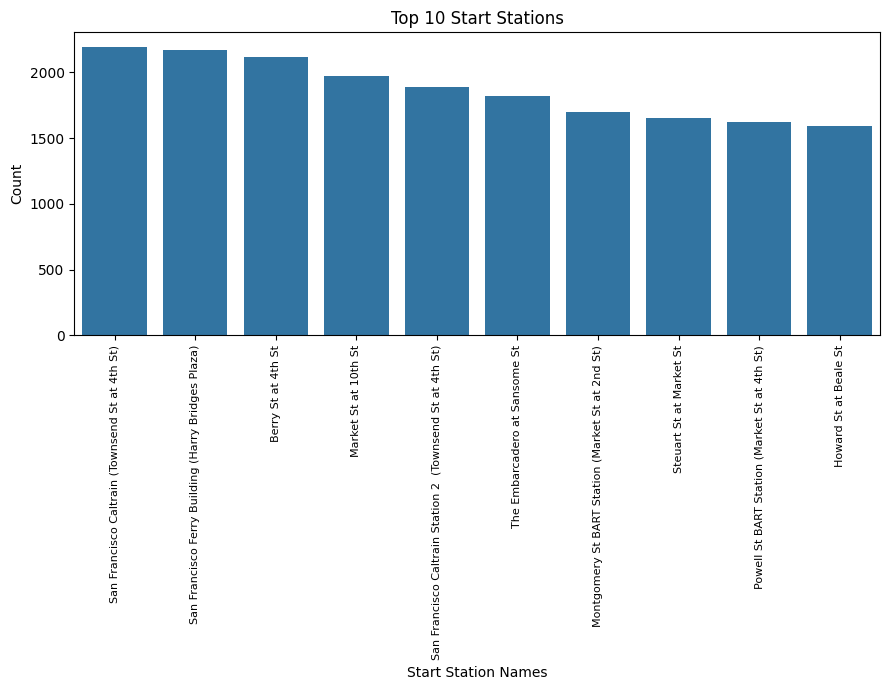

In [205]:
## popular Start Stations

plt.figure(figsize = (9,7))
sns.countplot(data, x = 'start_station_name', y = None, order = data['start_station_name'].value_counts().iloc[:10].index)
plt.title('Top 10 Start Stations')
plt.xlabel('Start Station Names')
plt.ylabel('Count')
plt.xticks(rotation = 90, fontsize =8)

plt.tight_layout()
plt.show()


##### **1. Why did you pick the specific chart?**

 To find and display the **top 10 most popular start stations** in the Ford GoBike dataset.

##### **2. What is/are the insight(s) found from the chart?**

- It indicates where users are most likely to begin their trips.

- **San Francisco Caltrain (Townsend St at 4th St.)**, **Berry St, at 4th St.**, and **San Francisco Ferry Building (Harry Bridges Plaza)** are the most frequently used start stations.

- There are high demand of bikes in these popular areas.

##### **3. Will the gained insights help creating a positive business impact?**
Are there any insights that lead to negative growth? Justify with specific reason.

**BUSINESS IMPACT**
- By ensuring sufficient bike availability at popular start stations, the business can reduce customer frustration and improve their experience.

**NEGATIVE IMPACT**
-  If the business focuses heavily on expanding popular stations without careful planning, it could lead to overcrowding and congestion in those areas, making it difficult for users to find docking spaces or navigate safely.

In [206]:
## Total Bikes Company has

total_bikes = data['bike_id'].nunique()
print(f'Total Bikes: {total_bikes}')

Total Bikes: 3065


#### Chart - 4

In [207]:
## Bike Share for all trips

fig = px.pie(data['bike_share_for_all_trip'].value_counts(), names=data['bike_share_for_all_trip'].value_counts().index,
             values=data['bike_share_for_all_trip'].value_counts().values,
             title = 'Bike Share for All Trips',
             height =400, width = 500,
             hole = 0.3  )

fig.show()

##### **1. Why did you pick the specific chart?**

To visualize the proportion of users who have opted for bike sharing for all their trips versus those who haven't.

##### **2. What is/are the insight(s) found from the chart?**

- The chart reveales the overall popularity of the "bike share for all trips" program among Ford GoBike users.

- "**No**" slice is relatively large, it indicates a significant portion of users who have not yet enrolled in the "bike share for all trips" program.

##### **3. Will the gained insights help creating a positive business impact?**
Are there any insights that lead to negative growth? Justify with specific reason.

**BUSINESS IMPACT**
- Promoting the program to users who haven't opted in, highlighting its benefits and value proposition.







#### Chart - 5

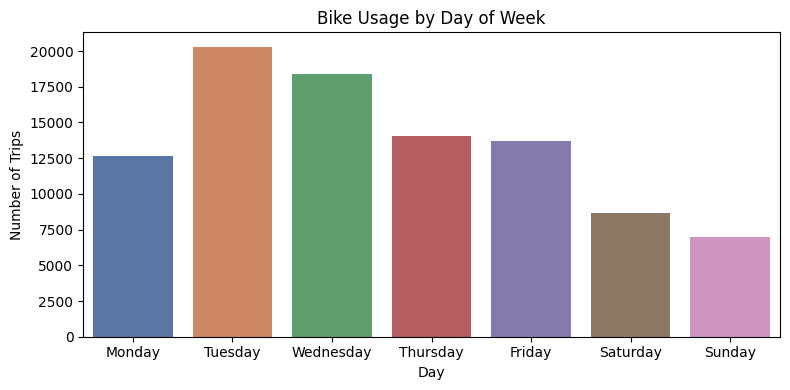

In [208]:
## Day of Week Usage

plt.figure(figsize=(8, 4))

order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

sns.countplot(x='day', data=data, order=order, palette='deep')
plt.title('Bike Usage by Day of Week')
plt.xlabel('Day')
plt.ylabel('Number of Trips')

plt.tight_layout()
plt.show()

##### **1. Why did you pick the specific chart?**

To create a bar chart visualizing the number of bike trips taken on each day of the week.

##### **2. What is/are the insight(s) found from the chart?**

- **Weekday vs. Weekend Usage:** There is a clear difference in bike usage between weekdays and weekends. Weekdays (Moday - Friday) generally show higher bike usage than compared to weekends(Saturday - Sunday).

- **Peek Weekdays:** Bike usage seems to peek on weekdays possibly indicating that bikes are primarily used for commuting or work-related trips during the week.

- **Lower Weekend Demand:** Weekends experience a noticeable drop in bike usage, suggesting that bikes are used less for leisure or recreational purposes compared to weekdays.

- **Specific Day Trends:** Tuesday or Wednesday have higher bike usage than other weekdays, indicating potential patterns related to work schedules. Sunday have lower bike usage compared to other days suggesting low end-of-week activities.

##### **3. Will the gained insights help creating a positive business impact?**
Are there any insights that lead to negative growth? Justify with specific reason.

**BUSINESS IMPACT**

-  Understanding the daily variations in bike usage can help optimize bike deployment strategies.

- Offering discounts or special deals on weekends might encourage more leisure trips and increase bike usage during off-peak periods.

**NEGATIVE IMPACT**

- If bike availability is not adequately managed during peak weekday demand, it could lead to overcrowding and congestion at popular stations, negatively impacting user experience.

#### Chart - 6

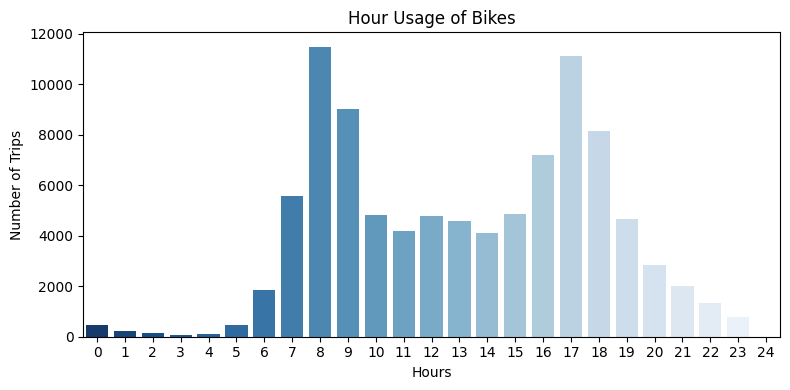

In [209]:
## Bike Usages by Hours
plt.figure(figsize=(8, 4))

hour_order = list(range(0, 25))

sns.countplot(x='hour', data=data, order=hour_order, palette='Blues_r')
plt.title('Hour Usage of Bikes')
plt.xlabel('Hours')
plt.ylabel('Number of Trips')

plt.tight_layout()
plt.show()

##### **1. Why did you pick the specific chart?**

Line chart showing the frequency of bike trips throughout the day, with a resolution of 1 minute.

##### **2. What is/are the insight(s) found from the chart?**

- **Peak Hours:** The line chart two distinct peak hours periods for bike usage.
   - One in the morning around **8-9 AM.**
   - Another in the evening around **5-6 PM**.

- **Off-Peak Hours:** Bike usage is considerably lower during the late night and early morning hours, from **midnight to 5 AM**.

##### **3. Will the gained insights help creating a positive business impact?**
Are there any insights that lead to negative growth? Justify with specific reason.

**BUSINESS IMPACT**

- Understanding the hourly variations in bike usage can help optimize bike deployment strategies.

- Adjusting staffing levels and operational hours at stations and customer support centers based on hourly usage patterns can improve efficiency and customer service.

**NEGATIVE IMPACT**

- If bike availability is not adequately managed during peak hour periods, it could lead to overcrowding and congestion at popular stations, negatively impacting user experience.

### **Bivariate Analysis**

In [210]:
subscriber = data[data['user_type'] == 'Subscriber']
customer = data[data['user_type'] == 'Customer']

print(f'Subscriber: {subscriber.shape[0]}')
print(f'Customer: {customer.shape[0]}')

Subscriber: 82458
Customer: 12344


#### Chart - 7

In [211]:
## Bike Usage by hour: Subscriber vs Customer
# Grouping trips by hour and user_type
hour_user_usage = data.groupby(['hour', 'user_type']).size().reset_index(name='trip_count')

# Line plot
fig = px.line(
    hour_user_usage,
    x='hour',
    y='trip_count',
    color='user_type',
    title='Bike Usage by Hour and User Type',
    labels={'start_hour': 'Start Hour', 'trip_count': 'Number of Trips'},
    template='plotly_white',
    category_orders={'hour': hour_order}
)

fig.update_layout(xaxis_tickmode='linear')
fig.show()


##### **1. Why did you pick the specific chart?**

Creates a visualization that shows **how the number of bike trips changes throughout the day for both Subscribers and Customers**, allowing for easy comparison of their usage patterns.

##### **2. What is/are the insight(s) found from the chart?**

**Subscribers tends to use the bikes the most than Customers throughout the day.**

**Peak Usage Times:**

- **Subscribers** show **peaks** in the morning **6-9 A.M.** and in the evening **3-6 P.M.**

**Leisure Usage:**

- **Customers** have more **evenly distributed usage throughout the day**, suggesting more recreational or leisure-based trips.

##### **3. Will the gained insights help creating a positive business impact?**
Are there any insights that lead to negative growth? Justify with specific reason.

**BUSINESS IMPACT**

- Ford GoBike can use this insight to strategically distribute bikes throughout the day to cater to both Customer and Subscriber usage patterns.

**NEGATIVE IMPACT**

- If **GoBike focuses heavily on even distribution without accounting for the higher demand during peak hours**, it could lead to **bike shortages** for Subscribers during those crucial periods.

- This could negatively impact Subscriber satisfaction and potentially lead to a loss of Subscribers.
-  GoBike must **prioritize meeting the demands of both user segments**, striking a balance between even distribution and peak-hour availability.

#### Chart - 8

In [212]:
## Bike Usage by day and User type

# Grouping trips by day and user_type
day_user_usage = data.groupby(['day', 'user_type']).size().reset_index(name='trip_count')

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Convert 'day' to categorical type
day_user_usage['day'] = pd.Categorical(day_user_usage['day'], categories=day_order, ordered=True)

# Now sort
day_user_usage = day_user_usage.sort_values('day')

# plot
fig = px.line(
    day_user_usage,
    x='day',
    y='trip_count',
    color='user_type',
    title='Bike Usage by Day and User Type',
    labels={'day': 'Day of the Week', 'trip_count': 'Number of Trips'},
    template='plotly_white',
    category_orders={'day': day_order}
)

fig.show()



##### **1. Why did you pick the specific chart?**

Creates a visualization that shows **how the number of bike trips changes throughout the hour for both Subscribers and Customers**, allowing for easy comparison of their usage patterns.

##### **2. What is/are the insight(s) found from the chart?**

**Subscribers tends to use the bikes the most than Customers throughout the week.**

**Peak Usage Times:**

- **Subscribers** show **peaks** during the **weekdays** particularly Tuesday and **Weekends** experience a **noticeable drop in bike usage**, suggesting that bikes are used less for leisure or recreational purposes compared to weekdays.

**Leisure Usage:**

- **Customers** have more **evenly distributed usage throughout the week**, suggesting more recreational or leisure-based trips.

#### Chart - 9

In [213]:
# Duration_mins by user_type

# Grouping trips by hour and user_type
duration_user_usage = data.groupby('user_type')['duration_mins'].mean().reset_index(name='Average Trip Duration(mins)')

# Line plot
fig = px.bar(
    duration_user_usage,
    x='user_type',
    y='Average Trip Duration(mins)',
    color='user_type',
    title='Average Trip Duration (mins) by user_type',
    labels={'user_type': 'User Type', 'Average Trip Duration(mins)': 'Average Trip Duration(mins)'},
    template='plotly_white',
    text = 'Average Trip Duration(mins)',
    height = 500, width = 500
)

fig.update_traces(
    texttemplate='%{text:.0f} mins',
    textposition='outside'
)

fig.update_layout(xaxis_tickmode='linear')
fig.show()


##### **1. Why did you pick the specific chart?**

Creates a barplot that shows visualization of **difference in average trip duration between Subscribers and Customers.**.

##### **2. What is/are the insight(s) found from the chart?**

- **Customers tend to have longer average trip durations compared to Subscribers.** This might indicate that Customers are more likely to use the bikes for leisure or tourism, while Subscribers use them for shorter, more frequent trips, like commuting.

##### **3. Will the gained insights help creating a positive business impact?**
Are there any insights that lead to negative growth? Justify with specific reason.

**BUSINESS IMPACT**

- Understanding typical trip durations can help with bike deployment strategies. **If Customers are taking longer trips, you might need to adjust how you distribute bikes across different locations to ensure availability.**

**NEGATIVE IMPACT**

- If **GoBike focuses heavily on even distribution without accounting for the higher demand**, it could lead to **bike shortages** for Subscribers during those crucial periods.

- This could negatively impact Subscriber satisfaction and potentially lead to a loss of Subscribers.
-  GoBike must **prioritize meeting the demands of both user segments**, striking a balance between even distribution and peak-hour availability.

In [214]:
# Duration_mins by Member Gender
duration_user_usage = data.groupby('member_gender')['duration_mins'].mean().reset_index(name='Average Trip Duration(mins)')

# Line plot
fig = px.bar(
    duration_user_usage,
    x='member_gender',
    y='Average Trip Duration(mins)',
    color='member_gender',
    title='Average Trip Duration (mins) by user_type',
    labels={'member_gender': 'Gender', 'Average Trip Duration(mins)': 'Average Trip Duration(mins)'},
    template='plotly_white',
    text = 'Average Trip Duration(mins)',
    height = 500, width = 500
)

fig.update_traces(
    texttemplate='%{text:.2f} mins',
    textposition='outside'
)

fig.update_layout(xaxis_tickmode='linear')
fig.show()


The analysis of trip durations across different genders revealed the following insights:

- **Female riders** have an average trip duration of approximately **14.20 minutes**.
- **Male riders** have a lower average trip duration of about **11.45 minutes**.
- Riders categorized as **Other** show the **highest average trip duration** at approximately **15.34 minutes**.

This suggests that **female** and **other** gender riders tend to take **longer trips** compared to **male** riders on average.



In [215]:
## trip Duration by day
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
fig = px.box(
    data,
    x='day',
    y='duration_mins',
    color='user_type',
    facet_col='user_type',
    title='Daily Trip Duration (mins) by User Type',
    labels={'duration_mins': 'Trip Duration (mins)', 'Day': 'Day'},
    template='plotly_white',
    height = 500, width = 700,
    category_orders={'day': day_order}
)

fig.update_xaxes(tickangle=270)
fig.show()


##### **1. Why did you pick the specific chart?**

Daily trip duration distributions, categorized by user type.

##### **2. What is/are the insight(s) found from the chart?**

- **Subscribers** appear to use the service for more **routine, time-bound trips** (likely commuting or short errands), while **Customers** tend to engage in **longer, more varied rides**, especially **noticeable over weekends**, aligning with possible recreational or sightseeing activities.

#### Chart - 11

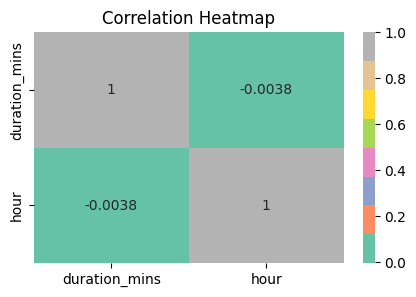

In [216]:
## Correlation

columns_ = ['duration_mins','hour']

plt.figure(figsize = (5,3))
correlation = data[columns_].corr()

sns.heatmap(correlation, annot = True,fmt = '.2g', cmap = 'Set2')
plt.title('Correlation Heatmap')
plt.show()

##### **1. Why did you pick the specific chart?**

The correlation heatmap itself is a visual representation of the relationships between variables in the dataset, showing how strongly they are correlated with each other.

##### **2. What is/are the insight(s) found from the chart?**

- **No meaningful linear relationship between the hour of the day and the trip duration.**

- The **time of day** (morning, afternoon, evening) when people ride **does not really change depending on duration of trip**.

## **5. Solution to Business Objective**

#### **What do you suggest the client to achieve Business Objective ?**


The analysis of trip duration behavior by user type reveals distinct usage patterns between **Subscribers** and **Customers**:

- **Subscribers** typically engage in **shorter, more frequent trips**, suggesting usage primarily for **daily commuting or routine travel**.

- **Customers**, on the other hand, record significantly **longer trip durations,** particularly **on weekends**, indicating usage for **leisure and recreational purposes.**

The correlation between **hour and duration_mins is -0.0038**, implying no meaningful relationship between the time of day and trip duration , further reinforcing that user behavior is primarily driven by user type rather than temporal factors.

To meet the business objectives of **increasing ridership, enhancing user engagement, and boosting revenue**, it is **recommended** that the company:

- Develop targeted strategies aimed at **converting high-engagement Customers into long-term Subscribers** by offering subscription incentives and loyalty programs.

- **Launch marketing initiatives** focused on weekend and leisure riders, such as special offers, partnership deals, and bundled ride packages.

- **Optimize bike distribution** and resource allocation based on user behavior:

- **Prioritize availability** in business hubs during weekdays for Subscribers.

- **Enhance availability in tourist areas** and parks during weekends for Customers.

By aligning operational strategies with the distinct usage patterns of each user segment, the company can **maximize utilization, increase customer lifetime value, and strengthen market position.**

In [217]:
round(data['duration_sec'].mean(),0)  ## Average trip duration in seconds

np.float64(871.0)

# **Conclusion**

In the course of the exploration, I found that the **average duration for all trips** is approximately **871 seconds** (~**14.5 minutes**).  
Most trips occurred on **Wednesdays** and **Tuesdays**, while **weekends** had the **fewest trip records**, although trip durations tended to be **longer** on weekends compared to weekdays.

An interesting pattern observed was the **peak usage around 8 AM to 9 AM** and again between **5 PM to 6 PM**.  
These periods align with typical **morning and evening rush hours**, indicating strong commuter usage.

More than **87% of the rides** were taken by **Subscribers**, and over **75.3%** of the total rides were completed by **male riders**.

Further findings revealed that:
- **Customers** tend to spend **more time per trip** compared to **Subscribers**.
- **Female subscriber riders** tend to have **slightly longer ride durations** compared to **male subscriber riders**.

Additionally:
- **User type** does **not significantly affect** the number of rides taken on any specific day.
- However, for any given day, **Customers** consistently tend to have **longer trip duration**


### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***